<a href="https://colab.research.google.com/github/adbioc/water/blob/main/fishywater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [136]:
os.chdir("/content/drive/My Drive/my_book/book_mypython")
!ls *.csv
df_fish=pd.read_csv('fishywater.csv')
df_bally=pd.read_csv('wpig_wdissolvedsolid_triplet.csv')




cdT1.csv	   fishywater.csv  ptbdb_abnormal.csv
death_18_1.csv	   flights.csv	   ptbdb_normal.csv
fish_filtered.csv  nnfinal.csv	   wpig_wdissolvedsolid_triplet.csv


In [137]:
fish=df_fish.values
h=list(df_fish)
h

['cl',
 'nm',
 'F1',
 'F2',
 'Zeta1',
 'Zeta2',
 'Zeta3',
 'K1',
 'K2',
 'K3',
 'Mu1',
 'Mu2',
 'Mu3',
 'D1',
 'D2',
 'D3',
 'pd1',
 'pd2',
 'pd3']

In [138]:
colF = df_fish.loc[: , "F1":"F2"]
colZeta=df_fish.loc[:,"Zeta1":"Zeta3"]
conductivity=df_fish.loc[:,"K1":"K3"]
mu=df_fish.loc[:,"Mu1":"Mu3"]
Diam=df_fish.loc[:,"D1":"D3"]
polydispersity=df_fish.loc[:,"pd1":"pd3"]






In [139]:
df_fish['F'] = colF.mean(axis=1)# axis=1 represents mean over columns
df_fish['Fs']=colF.std(axis=1)

df_fish['Z']=colZeta.mean(axis=1)
df_fish['Zs']=colZeta.std(axis=1)


df_fish['K']=conductivity.mean(axis=1)
df_fish['Ks']=conductivity.std(axis=1)

df_fish['M']=mu.mean(axis=1)
df_fish['Ms']=mu.std(axis=1)

df_fish["d"]=Diam.mean(axis=1)
df_fish["ds"]=Diam.std(axis=1)

df_fish['p']=polydispersity.mean(axis=1)
df_fish['ps']=polydispersity.std(axis=1)


df_fish










,cl,nm,F1,F2,Zeta1,Zeta2,Zeta3,K1,K2,K3,Mu1,Mu2,Mu3,D1,D2,D3,pd1,pd2,pd3,F,Fs,Z,Zs,K,Ks,M,Ms,d,ds,p,ps
0,1,450.059,222085.00,221683.00,-0.180,-0.659,-0.251,0.91800,0.94600,0.96300,0.918,0.946,0.963,1288.0,1063.0,1057.0,0.840,0.647,0.652,221884.00,284.256926,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014
1,1,451.045,227460.00,220790.00,-0.180,-0.659,-0.251,0.91800,0.94600,0.96300,0.918,0.946,0.963,1288.0,1063.0,1057.0,0.840,0.647,0.652,224125.00,4716.402231,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014
2,1,452.032,223112.00,223313.00,-0.180,-0.659,-0.251,0.91800,0.94600,0.96300,0.918,0.946,0.963,1288.0,1063.0,1057.0,0.840,0.647,0.652,223212.50,142.128463,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014
3,1,453.018,226330.00,223168.00,-0.180,-0.659,-0.251,0.91800,0.94600,0.96300,0.918,0.946,0.963,1288.0,1063.0,1057.0,0.840,0.647,0.652,224749.00,2235.871642,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014
4,1,454.004,224318.00,223927.00,-0.180,-0.659,-0.251,0.91800,0.94600,0.96300,0.918,0.946,0.963,1288.0,1063.0,1057.0,0.840,0.647,0.652,224122.50,276.478751,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,9,695.919,14586.10,14656.60,-0.197,0.189,-0.719,-0.01543,0.01483,-0.05633,1.680,1.770,1.830,462.2,557.3,599.8,0.469,0.454,0.093,14621.35,49.851028,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886
2255,9,696.905,13155.60,12984.40,-0.197,0.189,-0.719,-0.01543,0.01483,-0.05633,1.680,1.770,1.830,462.2,557.3,599.8,0.469,0.454,0.093,13070.00,121.056681,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886
2256,9,697.892,10931.50,11545.20,-0.197,0.189,-0.719,-0.01543,0.01483,-0.05633,1.680,1.770,1.830,462.2,557.3,599.8,0.469,0.454,0.093,11238.35,433.951432,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886
2257,9,698.878,10056.70,10951.60,-0.197,0.189,-0.719,-0.01543,0.01483,-0.05633,1.680,1.770,1.830,462.2,557.3,599.8,0.469,0.454,0.093,10504.15,632.789858,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886


In [140]:
dg=df_fish.loc[:,"F":"ps"]
dg['cl']=df_fish['cl']
dg.to_csv("fish_filtered.csv")

dg

,F,Fs,Z,Zs,K,Ks,M,Ms,d,ds,p,ps,cl
0,221884.00,284.256926,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014,1
1,224125.00,4716.402231,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014,1
2,223212.50,142.128463,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014,1
3,224749.00,2235.871642,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014,1
4,224122.50,276.478751,-0.363333,0.258504,0.942333,0.022723,0.942333,0.022723,1136.000000,131.670042,0.713000,0.110014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,14621.35,49.851028,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886,9
2255,13070.00,121.056681,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886,9
2256,11238.35,433.951432,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886,9
2257,10504.15,632.789858,-0.242333,0.455694,-0.018977,0.035712,1.760000,0.075498,539.766667,70.455683,0.338667,0.212886,9


In [163]:
s=pd.read_csv("fish_filtered.csv")
list(s)

['Unnamed: 0',
 'F',
 'Fs',
 'Z',
 'Zs',
 'K',
 'Ks',
 'M',
 'Ms',
 'd',
 'ds',
 'p',
 'ps',
 'cl']

In [164]:
 
X = dg.iloc[:, 0:12].values 
y = dg.iloc[:, 12].values 
X.shape
 

(2259, 12)

In [165]:
y = dg.iloc[:, 12]
y

0       1
1       1
2       1
3       1
4       1
       ..
2254    9
2255    9
2256    9
2257    9
2258    9
Name: cl, Length: 2259, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [167]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [168]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 


In [169]:
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
y_pred = classifier.predict(X_test) 


In [171]:
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 38,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0, 53]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

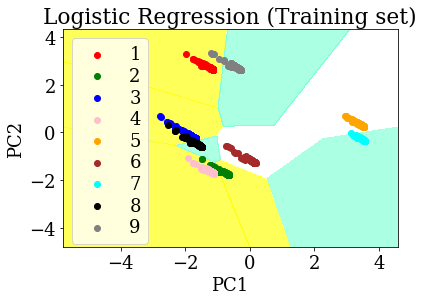

In [195]:
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 3, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 3, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.65, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue','pink','orange','brown','cyan','black','gray'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
#plt.legend() # to show legend 
plt.legend(loc='upper left', labelspacing=.2)
# show scatter plot 
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

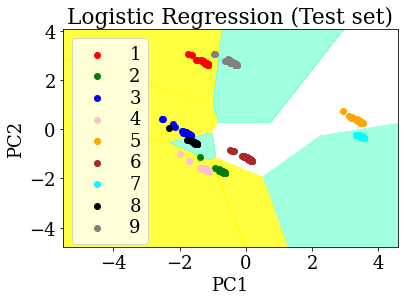

In [197]:
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 3, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 3, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue','pink','orange','brown','cyan','black','gray'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
#plt.legend() 
plt.legend(loc='upper left', labelspacing=.2) 
# show scatter plot 
plt.show() 

In [152]:
!ls *.csv

cdT1.csv	   fishywater.csv  ptbdb_abnormal.csv
death_18_1.csv	   flights.csv	   ptbdb_normal.csv
fish_filtered.csv  nnfinal.csv	   wpig_wdissolvedsolid_triplet.csv


# Biplot

No handles with labels found to put in legend.


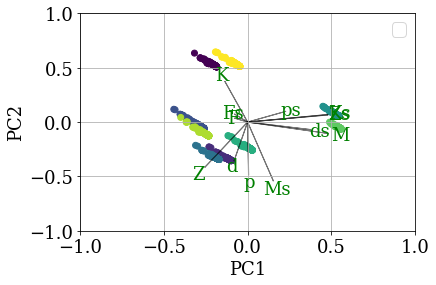

In [188]:
X = dg.iloc[:, 0:12].values 
y = dg.iloc[:, 12].values 
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels=list(dg))
plt.legend()
plt.show()

# Another way of python based biplot

In [154]:
X = dg.iloc[:, 0:12].values 
y = dg.iloc[:, 12].values 
H=np.array([list(dg)])
h=H[:,1:12]
h

array([['Fs', 'Z', 'Zs', 'K', 'Ks', 'M', 'Ms', 'd', 'ds', 'p', 'ps']],
      dtype='<U2')

# Another PCA implementation (Using R)

In [155]:
def biplot(X,header,target,scale = True,labels=None):
  import numpy as np
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  import matplotlib.pyplot as plt
  plt.figure(figsize=(14, 14))
  plt.rcParams.update({'font.size': 18, 'font.family': 'serif'})

  if scale:
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X) 

  pca = PCA()
  x_new = pca.fit_transform(X)  
  score = x_new[:,0:2]
  coeff = np.transpose(pca.components_[0:2, :])  

  xs = score[:,0]
  ys = score[:,1]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())

  scatter = plt.scatter(xs * scalex,ys * scaley, c = target)

  ll = np.unique(target)
  handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in ll]
  plt.legend(handles, ll)

  for i,val in enumerate(header):
      plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
      if labels is None:
          plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, val, color = 'g', ha = 'center', va = 'center')
      else:
          plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  plt.grid()



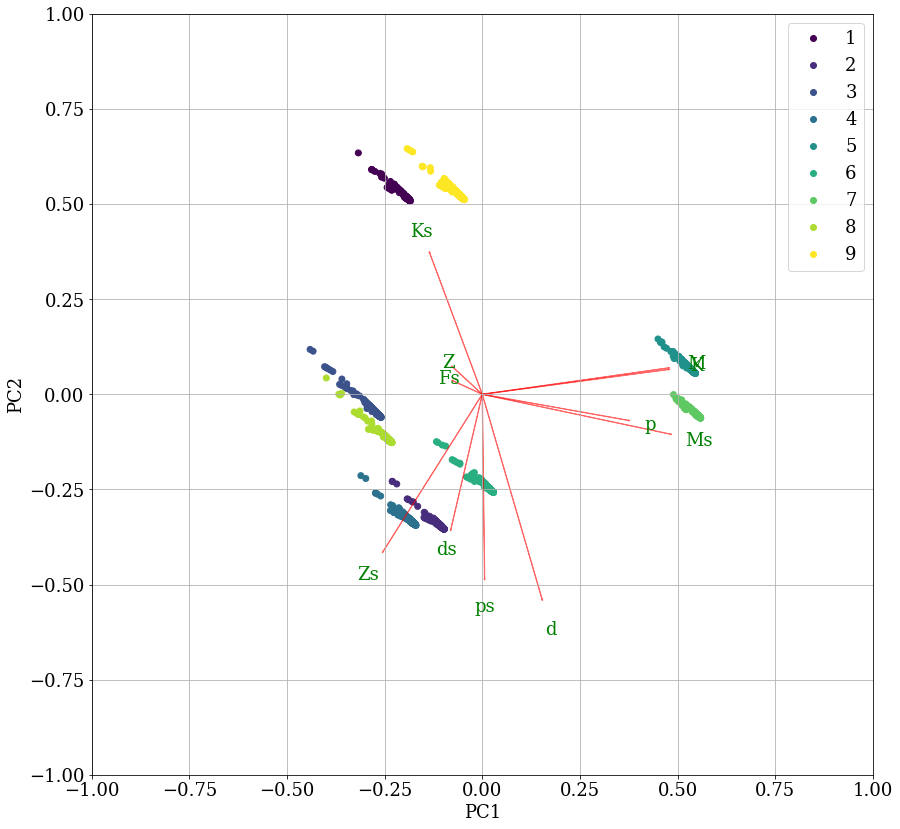

In [156]:
biplot(X,list(dg)[1:12],y,scale =True,labels=None)


In [157]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [158]:
%%R
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)

R[write to console]: Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



In [159]:
%%R
fish<-read.csv("fish_filtered.csv")

In [160]:
%%R
summary(fish)

       X                F                 Fs                Z          
 Min.   :   0.0   Min.   :   6411   Min.   :    0.0   Min.   :-0.3633  
 1st Qu.: 564.5   1st Qu.:  61800   1st Qu.:  369.3   1st Qu.:-0.2423  
 Median :1129.0   Median : 128122   Median :  922.8   Median :-0.0732  
 Mean   :1129.0   Mean   : 194200   Mean   : 1581.8   Mean   :-0.1156  
 3rd Qu.:1693.5   3rd Qu.: 201046   3rd Qu.: 1877.7   3rd Qu.:-0.0367  
 Max.   :2258.0   Max.   :1565000   Max.   :21213.2   Max.   : 0.1484  
       Zs               K                   Ks                 M          
 Min.   :0.0700   Min.   :-0.023783   Min.   :0.005476   Min.   : 0.9423  
 1st Qu.:0.1220   1st Qu.:-0.013337   1st Qu.:0.009573   1st Qu.: 2.4767  
 Median :0.2585   Median :-0.005560   Median :0.022723   Median : 2.8200  
 Mean   :0.7017   Mean   : 0.098836   Mean   :0.055294   Mean   : 4.5573  
 3rd Qu.:0.4557   3rd Qu.: 0.005836   3rd Qu.:0.035712   3rd Qu.: 3.5633  
 Max.   :2.9772   Max.   : 0.942333   Max.   :

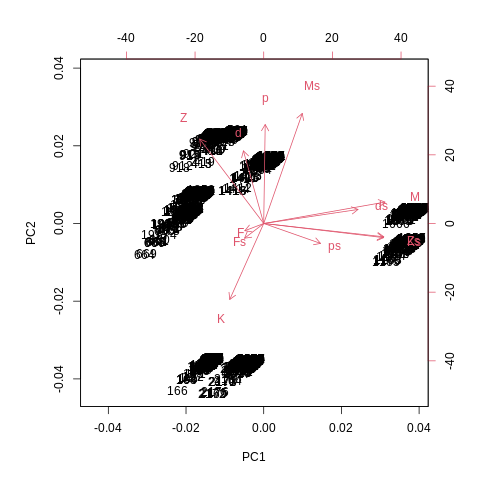

In [161]:
%%R
fish.pca <- prcomp(fish[,c(2:13)], center = TRUE,scale. = TRUE)
summary(fish.pca)
biplot(fish.pca,ellipse=TRUE)

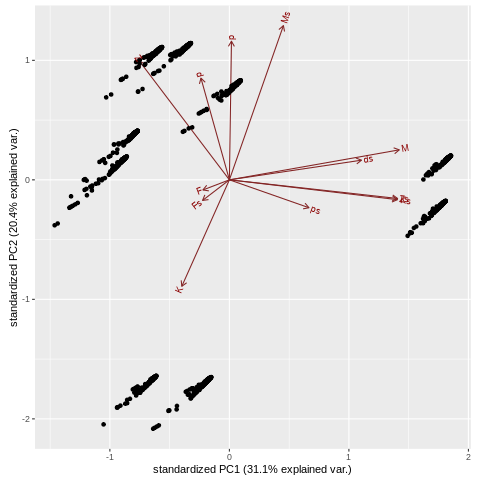

In [162]:
%%R

ggbiplot(fish.pca,ellipse=TRUE)
